Notre projet est décomposé en 3 parties :

- <b>L'Exploration</b>, le Nettoyage (Exploratory Data Analysis (EDA)) et la Normalisation du Texte.
- <b>La Transformation</b> du texte et la création de features
- <b>La Classification</b> du Texte à l'aide du ML

# <font color = Green>Partie 1 : Exploratory Data Analysis</font>

Objectifs :
- Comprendre la forme et la structure de nos données
- Faire un premier netttoyage de nos données
- Avoir une première représentation de nos données
- Repérer des patterns dans nos données

## <font color = purple>1. Préléminaires</font>

### <font color = grey>1.1 Contexte</font>

Bibliothèque de prétraitement : nltk.
</br>nltk est simple mais un peu désuet. Il reste néanmoins très pertinent lors d'une première approche au NLP.

### <font color = grey>1.2 Librairies</font>

In [1]:
#Librairies classiques
import os, sys, time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Contenu du repertoire
!tree

Folder PATH listing for volume OS
Volume serial number is 6A45-4B07
C:.
+---cleaned
�   +---.ipynb_checkpoints
+---source


### <font color = grey>1.3 Chargement des données</font>

In [3]:
#Chemin de notre fichier source
data = "./source/"
os.listdir(data)

['QueryResults.csv']

In [4]:
#Chargement du Dataframe
fn = data + 'QueryResults.csv'
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,4419704,57,25057,11,3
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7651,11,5
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,36196608,97,56536,31,8
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59775,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56971,42,7


### <font color = grey>1.4 Filtre / échantillonage</font>

Suite a des contrainte machine et de pertinence des thread, nous ne conservons que les thread ayant plus de 5 de score.
</br>Il s'agit d'un choix arbitraire donc contestable.

In [5]:
df = df[df['Score']>5]

-----

## <font color = purple>2. Premier apperçu des données</font>

### <font color = grey>2.1 Affichage du dataframe</font>

In [6]:
#5 premiers éléments
df.head(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>,4419704,57,25057,11,3
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>,18449,12,7651,11,5
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...,36196608,97,56536,31,8
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>,19589,64,59775,16,5
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...,20084,86,56971,42,7


In [7]:
#5 derniers éléments
df.tail(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
27650,ETL in Java Spring Batch vs Apache Spark Bench...,<p>I have been working with Apache Spark + Sca...,<spring><spring-boot><apache-spark><spring-bat...,53689531,20,11914,12,1
27651,Errors installing Composer on macOS (JIT compi...,<p>When I run <code>composer --version</code> ...,<php><macos><composer-php><jit><php-7.3>,53690624,63,34213,18,8
27652,Performant cartesian product (CROSS JOIN) with...,<blockquote>\n <p>The contents of this post w...,<python><pandas><numpy><dataframe><merge>,53699012,68,23298,24,5
27653,What is the spring-boot-configuration-processo...,<h1>Introduction</h1>\n\n<p>So I noticed the f...,<java><spring><maven><spring-boot><gradle>,53707080,59,53974,12,2
27654,Cannot add task 'wrapper' as a task with that ...,<p>When installing <strong>'react-native init ...,<android><reactjs><react-native><wrapper><expo>,53709282,141,97914,19,7


In [8]:
#5 individus au hasard (sample)
df.sample(5)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
12656,Remove whitespace and line breaks between HTML...,"<p>Using jQuery, I'd like to remove the whites...",<javascript><jquery><regex><string><replace>,1539367,40,58859,22,8
25416,Android Data Binding using include tag,<h2>Update note:</h2>\n\n<p>The above example ...,<java><android><data-binding><android-button><...,32947440,168,97269,31,8
13252,memset() or value initialization to zero out a...,<p>In Win32 API programming it's typical to us...,<c++><c><visual-c++><struct><initialization>,1998752,91,111865,41,8
7691,Is there a grep equivalent for find's -print0 ...,<p>I often want to write commands like this (i...,<bash><unix><grep><find><xargs>,15976570,55,20718,14,6
22757,Most efficient method to groupby on an array o...,<p>What is the most efficient way to groupby o...,<javascript><arrays><object><group-by><undersc...,14446511,809,978380,255,56


Suite à cette première analyse,
</br>nous remarquons des choses intéréssantes :
- la présence de balises html dans le body
- la présence de mots particulier, C# par exemple ou encore .NET
- la présence des caractères <> pour séparer les tags

### <font color = grey>2.2. Structure</font>

In [9]:
#Taille du dataframe
df.shape

(27655, 8)

In [10]:
#Type de données
df.dtypes

Title            object
Body             object
Tags             object
Id                int64
Score             int64
ViewCount         int64
FavoriteCount     int64
AnswerCount       int64
dtype: object

In [11]:
#Information du Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27655 entries, 0 to 27654
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27655 non-null  object
 1   Body           27655 non-null  object
 2   Tags           27655 non-null  object
 3   Id             27655 non-null  int64 
 4   Score          27655 non-null  int64 
 5   ViewCount      27655 non-null  int64 
 6   FavoriteCount  27655 non-null  int64 
 7   AnswerCount    27655 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.9+ MB


In [12]:
#Nombre de colonne par type (Utile pour beaucoup de colonne)
df.dtypes.value_counts()

int64     5
object    3
dtype: int64

In [13]:
#nb de valeurs unique par colonne
df.nunique()

Title            27655
Body             27655
Tags             27183
Id               27655
Score             1080
ViewCount        25245
FavoriteCount      589
AnswerCount         77
dtype: int64

Nous avons 27655 individus, nous remarquons donc que :
- Tous les titres sont différents
- Tous les Body sont différents
- Un ID est attribué à chaque individu (clef primaire en SQL)

### <font color = grey>2.3 NaN et valeurs dupliquées</font>

In [14]:
#Nb de Nan par colonne
df.isna().sum().sort_values() 

Title            0
Body             0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [15]:
#Ratio Nan par colonne
df.isna().mean().sort_values()

Title            0.0
Body             0.0
Tags             0.0
Id               0.0
Score            0.0
ViewCount        0.0
FavoriteCount    0.0
AnswerCount      0.0
dtype: float64

In [16]:
#Nombre d'individus dupliquée (i.e. toute les colonnes sont égales)
df.duplicated().sum()

0

In [17]:
#Nombre d'individus dupliquée par colonne
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 472
col : Id -> duplicated : 0
col : Score -> duplicated : 26575
col : ViewCount -> duplicated : 2410
col : FavoriteCount -> duplicated : 27066
col : AnswerCount -> duplicated : 27578


On remarque qu'il y a <b>472 individus en doublons</b> au niveau des tags.
</br>Cela n'est en rien surpprenant. En effet, avoir 2 individus avec les même tags n'est pas incohérent au contraire.
</br>Néanmoins, il faudra traiter ces balises pour facilité les traitements futurs

In [18]:
#Affichage des lignes dupliquées pour "Tags"
idx = df.duplicated(subset = "Tags", keep = "first")
df.loc[idx, :].sort_values("Tags")

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
17511,Add Keypair to existing EC2 instance,<p>I was given <strong>AWS</strong> Console ac...,<amazon-web-services><authentication><ssh><ama...,3260739,266,245353,96,10
25456,How can I modify ripple color when using ?attr...,<p>I've seen some SO questions and they gave s...,<android><android-layout><android-5.0-lollipop...,33061050,127,74243,50,8
23241,Disable multi finger touch in my app,<p>My app uses one Activity to host several fr...,<android><android-layout><android-intent><andr...,12777435,22,26614,13,3
6037,gen already exists but is not a source folder,"<p>I am developing my Android project, After I...",<android><android-layout><android-intent><andr...,9532045,92,57225,22,15
27483,How to add .aar dependency in library module?,<p>I am having one <code>.aar</code> file of o...,<android><android-studio><gradle><android-grad...,34765190,36,30993,11,5
...,...,...,...,...,...,...,...,...
13683,How and/or why is merging in Git better than i...,<p>I've heard in a few places that one of the ...,<svn><git><version-control><mercurial><merge>,2471606,408,68728,267,7
26019,Example of delayed expansion in batch file,<p>Can someone give me an example of where a b...,<windows><batch-file><cmd><environment-variabl...,10558316,54,59855,12,5
27198,Where is the Write-Combining Buffer located? x86,<p>How is the Write-Combine buffer physically ...,<x86><intel><cpu-architecture><cpu-cache><amd-...,49959963,14,5053,12,3
19105,"xmlns, xmlns:xsi, xsi:schemaLocation, and targ...",<p>For the following XML fragment:</p>\n\n<pre...,<xml><xsd><xml-namespaces><xsd-validation><xml...,34202967,73,57493,28,2


### <font color = grey>2.4 Inspection des données</font>

In [19]:
# description des colonnes numériques
df.describe(include = np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,2.765500e+04,27655.000000,2.765500e+04,27655.000000,27655.000000
mean,1.672991e+07,113.756102,1.106085e+05,42.779534,7.140409
std,1.524737e+07,352.306308,2.443554e+05,146.674260,6.784792
min,4.000000e+00,6.000000,2.710000e+02,11.000000,1.000000
25%,4.181782e+06,29.000000,2.157400e+04,14.000000,3.000000
50%,1.200500e+07,51.000000,4.842300e+04,19.000000,5.000000
75%,2.590548e+07,99.000000,1.108880e+05,35.000000,9.000000
max,7.256872e+07,26510.000000,1.008203e+07,11616.000000,127.000000


Ces colonnes ne nous interessent pas.

In [20]:
#description des colonnes texte
df.describe(include = object)

,Title,Body,Tags
count,27655,27655,27655
unique,27655,27655,27183
top,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<java><spring><jpa><spring-data><spring-data-jpa>
freq,1,1,19


Liste des colonnes <font color = green>conservées</font> pour la suite de notre projet :
- <b>Title</b> : Il s'agit de la question / du titre du topic
- <b>Body</b> : Il s'agit du contenu du topic, dans un premier temps nous ne l'utiliserons pas.
- <b>Tags</b> : Il s'agit de la valeur cible (Y)

Liste des colonnes <font color = red>non conservées</font> pour la suite de notre projet :
- <b>Id</b> : nous conservons les index 
- <b>Score</b> / <b>ViewCount</b> / <b>FavoriteCount</b> / <b>AnswerCount</b> : Ces colonnes ne nous sont d'aucune utilité dans la suggestion de Tags

-----

## <font color = Purple>3. Cleaning des Données</font>

### <font color = grey>3.1 Selection des colonnes</font>

In [21]:
cols = ["Title", "Body","Tags"]
df = df[cols]
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","<p>When typing variables in Bash, what is the ...",<bash><shell><variables><scope><declare>
1,Dealing with PHP server and MySQL server in di...,<p>For those of us who use standard shared hos...,<php><mysql><datetime><date><timezone>
2,Difference between async/await and ES6 yield w...,<p>I was just reading this fantastic article «...,<javascript><node.js><ecmascript-6><generator>...
3,Loading System.ServiceModel configuration sect...,"<p>Using C# .NET 3.5 and WCF, I'm trying to wr...",<c#><.net><xml><wcf><configurationmanager>
4,XML Serialization and Inherited Types,"<p>Following on from my <a href=""https://stack...",<c#><xml><inheritance><serialization><xml-seri...


### <font color = grey>3.2. Suppression des Nan</font>

In [22]:
df.isna().mean()

Title    0.0
Body     0.0
Tags     0.0
dtype: float64

Pas de Nan ==> pas de suppression. 
</br>sinon, on utilise la fonction dropna()

### <font color = grey>3.3 Gestion des valeurs dupliquées</font>

In [23]:
for col in df.columns:
    n = df.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : Title -> duplicated : 0
col : Body -> duplicated : 0
col : Tags -> duplicated : 472


Pas d'action car les tags dupliquées sont "logique", sinon :

In [24]:
#Drop duplciate :
#df.drop_duplicates(subset = "COLONNE", inplace = True)

----

## <font color = purple>4. Exploration des Données</font>

In [25]:
import nltk
from wordcloud import WordCloud

### <font color = grey>4.1. La cible "Tags"</font>

In [26]:
#supression des <, >
df["Tags"] = df["Tags"].str.replace("><"," ")
df["Tags"] = df["Tags"].str.replace("<","")
df["Tags"] = df["Tags"].str.replace(">","")

In [27]:
df["Tags"].head(10)

0                   bash shell variables scope declare
1                     php mysql datetime date timezone
2    javascript node.js ecmascript-6 generator ecma...
3                 c# .net xml wcf configurationmanager
4    c# xml inheritance serialization xml-serializa...
5             mysql database performance innodb myisam
6              python mysql django django-models enums
7       sql database-design tags data-modeling tagging
8            c++ c include header-files c-preprocessor
9                       .net asp.net url uri authority
Name: Tags, dtype: object

In [28]:
df['Tags'] = df['Tags'].apply(lambda x: x.split())

In [29]:
df["Tags"].head(10)

0             [bash, shell, variables, scope, declare]
1               [php, mysql, datetime, date, timezone]
2    [javascript, node.js, ecmascript-6, generator,...
3           [c#, .net, xml, wcf, configurationmanager]
4    [c#, xml, inheritance, serialization, xml-seri...
5       [mysql, database, performance, innodb, myisam]
6        [python, mysql, django, django-models, enums]
7    [sql, database-design, tags, data-modeling, ta...
8      [c++, c, include, header-files, c-preprocessor]
9                 [.net, asp.net, url, uri, authority]
Name: Tags, dtype: object

In [30]:
all_tags = [item for sublist in df['Tags'].values for item in sublist]

In [31]:
#Nombre de Tags :
len(all_tags)

138275

In [32]:
#Nombre de Tags sans doublons :
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

12553

In [33]:
#On ne conserve que les 100 Tags les plus utilisés:
flat_list = [item for sublist in df['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [34]:
#Affichage des 100 tags conservés
tags_features

['python',
 'java',
 'javascript',
 'c#',
 'ios',
 'android',
 'c++',
 '.net',
 'iphone',
 'objective-c',
 'html',
 'jquery',
 'php',
 'c',
 'linux',
 'css',
 'node.js',
 'sql',
 'performance',
 'swift',
 'xcode',
 'asp.net',
 'spring',
 'windows',
 'asp.net-mvc',
 'mysql',
 'cocoa-touch',
 'json',
 'algorithm',
 'multithreading',
 'ruby-on-rails',
 'string',
 'database',
 'arrays',
 'macos',
 'git',
 'django',
 'bash',
 'pandas',
 'sql-server',
 'c++11',
 'ruby',
 'image',
 'numpy',
 'python-3.x',
 'wpf',
 'ajax',
 'r',
 'shell',
 'unit-testing',
 'security',
 'reactjs',
 'hibernate',
 'rest',
 'visual-studio',
 'machine-learning',
 'http',
 'angularjs',
 'jpa',
 'postgresql',
 'gcc',
 'google-chrome',
 'dataframe',
 'entity-framework',
 'ipad',
 'eclipse',
 'authentication',
 'unix',
 'file',
 'asynchronous',
 'optimization',
 'xml',
 'list',
 'oop',
 'image-processing',
 'ssl',
 'debugging',
 'spring-boot',
 'cocoa',
 'ubuntu',
 'spring-mvc',
 'class',
 'android-studio',
 'datetime'

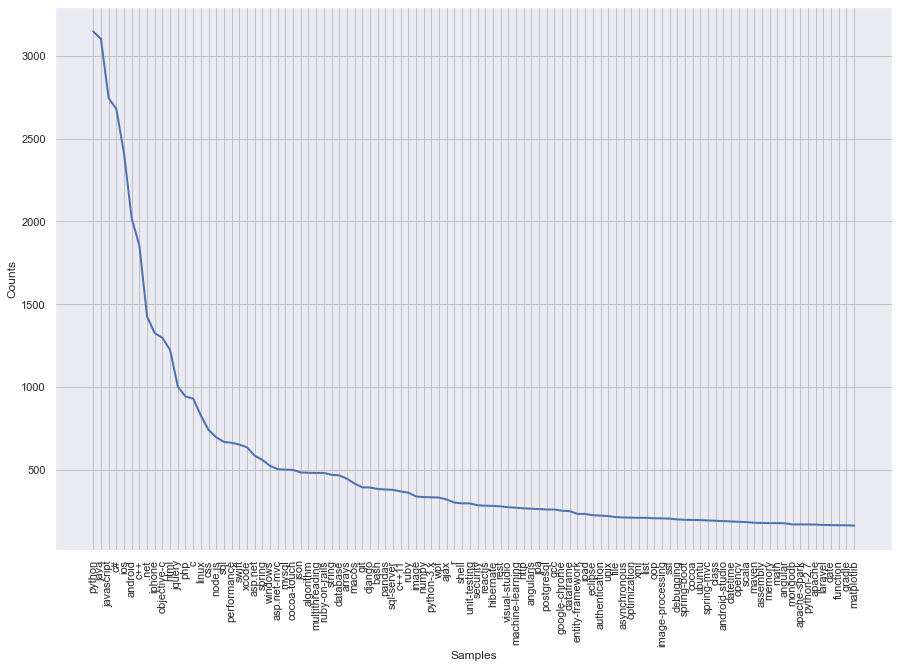

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
#Subplot des 100 tags :
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(100, cumulative=False)

In [36]:
def use_wordcloud(corpus):
    wordcloud = WordCloud(background_color = "white",
                     stopwords = [],
                     max_words = 50).generate(" ".join(corpus))
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

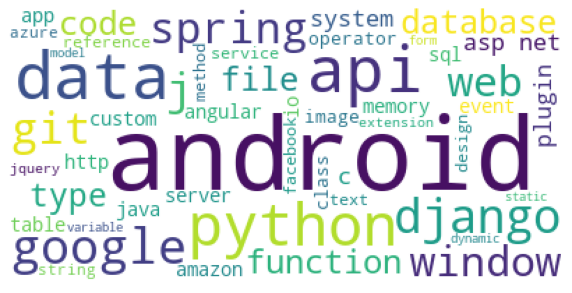

In [37]:
use_wordcloud(keywords)

In [38]:
#Définition d'une fonction d'extraction des 100 tags les plus fréquents d'un corpus
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [39]:
#On applique notre fonction a df["Tags"]
df['Tags'] = df['Tags'].apply(lambda x: most_common(x))

#On remplace les cellule sans tag par des Nan (faciliter le traitement)
df['Tags'] = df['Tags'].apply(lambda x: x if len(x)>0 else None)

In [40]:
df.shape

(27655, 3)

In [41]:
#On supprimme les individu sans Tags
df.dropna(subset=['Tags'], inplace=True)

In [42]:
df.shape

(26081, 3)

In [43]:
print("Nous avons supprimmé " + str(27655 - 26081) + " individus")

Nous avons supprimmé 1574 individus


### <font color = grey>4.2. body</font>

In [44]:
df["Body"].head(10)

0    <p>When typing variables in Bash, what is the ...
1    <p>For those of us who use standard shared hos...
2    <p>I was just reading this fantastic article «...
3    <p>Using C# .NET 3.5 and WCF, I'm trying to wr...
4    <p>Following on from my <a href="https://stack...
5    <p>I'm working on a projects which involves a ...
6    <p>How do I go about specifying and using an E...
7    <p>I've heard of a few ways to implement taggi...
8    <p>What is the difference between using angle ...
9    <p>Is there a simple way in .NET to quickly ge...
Name: Body, dtype: object

In [45]:
from bs4 import BeautifulSoup

In [46]:
#supression des balises html
df['Body'] = df['Body'].apply(lambda x: BeautifulSoup(x).get_text()) 

In [47]:
df["Body"].head(10)

0    When typing variables in Bash, what is the dif...
1    For those of us who use standard shared hostin...
2    I was just reading this fantastic article «Gen...
3    Using C# .NET 3.5 and WCF, I'm trying to write...
4    Following on from my previous question I have ...
5    I'm working on a projects which involves a lot...
6    How do I go about specifying and using an ENUM...
7    I've heard of a few ways to implement tagging;...
8    What is the difference between using angle bra...
9    Is there a simple way in .NET to quickly get t...
Name: Body, dtype: object

### <font color = grey>4.3. Title</font>

In [48]:
#Longueur de chaque Document :
df.Title.apply(lambda i : len(i))

0         63
1         64
2         60
3         76
4         37
        ... 
27650     53
27651     60
27652     53
27653    130
27654     65
Name: Title, Length: 26081, dtype: int64

c:\Users\Anthony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Title'>

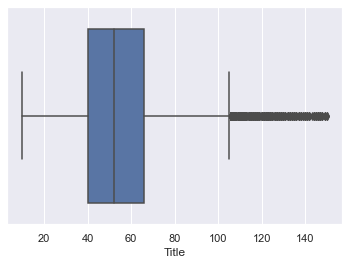

In [49]:
#Affichage avec un boxplot :
tmp = df.Title.str.len()
sns.boxplot(tmp)

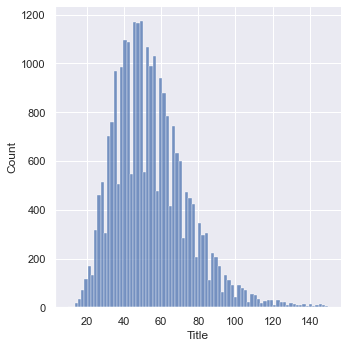

In [50]:
#Affichage sous forme de Displot :
sns.displot(tmp)

In [51]:
#Nous Stockons les infos sur la longueur du titre dans la colonne _len_title :
df["_len_txt"] = tmp

### <font color = grey>4.4. Analyse Multi-variée</font>

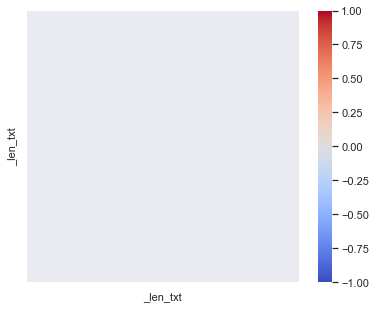

In [52]:
# Matrice de corrélation
corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fog, ax = plt.subplots(1, 1, figsize = (7, 5))
ax = sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, cmap = "coolwarm", annot = True, fmt = ".2f", square = True)

Non utile dans notre cas car nous n'avons pas de variable Numérique !

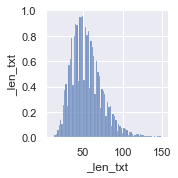

In [53]:
sns.pairplot(df)

Non utile dans notre cas car nous n'avons pas de variable Numérique

In [54]:
#Affichages des 10 plus court titres
df.sort_values("_len_txt").head(5)

,Title,Body,Tags,_len_txt
514,TFS vs SVN,I am about to start a project (.NET) and need ...,[.net],10
3215,.Net Encryption,What I would like to know is the definite appr...,[.net],15
1292,Is assert evil?,The Go language creators write:\n\nGo doesn't ...,"[c++, c]",15
5787,Spring vs Jboss,What are the advantages and disadvantages for ...,[spring],15
14563,Monitor vs lock,When is it appropriate to use either the Monit...,"[c#, .net, multithreading]",15


In [55]:
#Affichages des 10 plus long titre
df.sort_values("_len_txt").tail(5)

,Title,Body,Tags,_len_txt
4344,InvalidArgumentException: Message: invalid arg...,When I am trying to use --user-data-dir for th...,"[python, google-chrome]",149
4687,"XCode getting ""target specifies product type '...","When running my project in XCode, my tests giv...","[ios, objective-c, xcode, unit-testing]",149
19066,MediaSessionCompat:Targeting S+ (version 31 an...,I'm trying to update my application to Android...,"[java, android, android-studio]",149
24888,This app is not authorized to use Firebase Aut...,"Firebase auth was working fine, the debug buil...","[java, android, android-studio]",150
27551,Selenium: WebDriverException:Chrome failed to ...,Recently I switched computers and since then I...,"[python, google-chrome]",150


Nous pouvons nous séparer de la colonne "len_txt" qui a été utile pour l'analyse.

In [56]:
df.drop(columns = "_len_txt", inplace = True)
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","When typing variables in Bash, what is the dif...","[bash, shell]"
1,Dealing with PHP server and MySQL server in di...,For those of us who use standard shared hostin...,"[php, mysql, datetime, date]"
2,Difference between async/await and ES6 yield w...,I was just reading this fantastic article «Gen...,"[javascript, node.js]"
3,Loading System.ServiceModel configuration sect...,"Using C# .NET 3.5 and WCF, I'm trying to write...","[c#, .net, xml]"
4,XML Serialization and Inherited Types,Following on from my previous question I have ...,"[c#, xml]"


In [57]:
#Enregistrement en csv :
df.to_csv("cleaned/df_cleaned.csv", index = False)

### <font color = grey>4.5. Exploration du Corpus et des Documents</font>

Création de la fonction "Print N documents au hasard"

In [58]:
def print_sample(sub_df, n_samp = 10) :
    """Visualisation n_samp documents du Corpus"""
    
    samp = sub_df.sample(n_samp)
    
    for idx, ser in samp.iterrows() :
        print("Title :" + ser["Title"])
        print("Tags :", ser["Tags"])
        print("Body :" + ser["Body"] + "..." + "\n\n")

In [59]:
print_sample(df, n_samp = 2)

Title :Compile a version agnostic DLL in .NET
Tags : ['c#', '.net']
Body :Scenario
I have two wrappers around Microsoft Office, one for 2003 and one for 2007. Since having two versions of Microsoft Office running side by side is "not officially possible" nor recommended by Microsoft, we have two boxes, one with Office 2003 and the other with Office 2007. We compile the wrappers separately. The DLLs are included in our solution, each box has the same checkout but with either Office 2003 or 2007 "unloaded" so it doesn't attempt to compile that particular DLL. Failure to do that will throw errors on compilation due to the Office COM DLLs not available. 
We use .NET 2.0 and Visual Studio 2008.
Facts
Since Microsoft mysteriously changed the Office 2003 API in 2007, renaming and changing some methods (sigh) thus making them not backwards compatible, we need the two wrappers.
We have each build machine with the solution and one Office DLL activated. E.g.: the machine with Office 2003 has the 

--------
--------

# <font color = green>Partie 2 : Text Processing</font>

## <font color = purple>1. Préliminaires</font>

### <font color = grey>1.1. Contexte</font>

L'objectif de cette partie est :
- d'Explorer les principales transformations
- d'Analyser le corpus
- d'Essayer différents transofrmations
- de Réduire la dimensionnalité de nos données (réduction du nb de tokens sur notre corpus)

Attention : Ce notebook présente l'ensemble des pistes de recherche / essais.
Ainsi, vous pouvez ignorer les parties _____ qui détails l'ensemble des teste nous amenans à l'étape _____

### <font color = grey>1.2. Librairies</font>

In [60]:
# builtin :
import os, sys, time, random

# data :
import pandas as pd
import numpy as np

# NLP :
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


# Vizualisation :
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image #Pillow

### <font color = grey>1.3. Librairies externes et Options</font>

Afin d'utiliser certaines fonctionalitées nltk il faut télécharger des librairies externes (Asset).
</br>ex: "stopwords" contient une liste des stop words anglais.

In [61]:
#téléchargement :

nltk.download("omw-1.4")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("words")

[nltk_data] Downloading package omw-1.4 to C:\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

### <font color = grey>1.4. Chargement des données</font>

In [62]:
# chemin d'accès au fichier :
data = "./cleaned/"
os.listdir(data)

['.ipynb_checkpoints',
 'df_cleaned.csv',
 'final_df.csv',
 'min_10_words.csv',
 'min_5_words.csv',
 'tokens_body_list.csv',
 'tokens_list.csv',
 'tokens_title_list.csv',
 'unique_words.csv']

In [63]:
# Chargement du dataframe :
fn = data + "df_cleaned.csv"
df = pd.read_csv(fn)
df.head()

,Title,Body,Tags
0,"Differences between declare, typeset and local...","When typing variables in Bash, what is the dif...","['bash', 'shell']"
1,Dealing with PHP server and MySQL server in di...,For those of us who use standard shared hostin...,"['php', 'mysql', 'datetime', 'date']"
2,Difference between async/await and ES6 yield w...,I was just reading this fantastic article «Gen...,"['javascript', 'node.js']"
3,Loading System.ServiceModel configuration sect...,"Using C# .NET 3.5 and WCF, I'm trying to write...","['c#', '.net', 'xml']"
4,XML Serialization and Inherited Types,Following on from my previous question I have ...,"['c#', 'xml']"


In [64]:
#Taille du dataframe
df.shape

(26081, 3)

In [65]:
#En cas de problème de perf, creation du sample
# df = df.sample(frac = 0.3)

## <font color = purple>2. Processing</font>

In [66]:
import re
from nltk.tokenize import ToktokTokenizer
from string import punctuation

### <font color = grey>2.1. RegExp</font>

In [67]:
#Déinition de la fonction clean_text afin de passer des expressions Régulières :
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[0-9]+", "", text) #Remove numeric values
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

### <font color = grey>2.2. Tokenization & punctuation</font>

In [68]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [70]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [71]:
#Permet de n'enlever que la ponctuation "unitaire" , i.e. ne filtre pas les mots comme c#, .net, c++ etc.
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

### <font color = grey>2.3. Lemmatization</font>

In [72]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

### <font color = grey>2.4. Stop Words</font>

In [73]:
def stopWordsRemove(text):
    
    stop_words = set(stopwords.words("english"))
    
    words=token.tokenize(text) #Essentiel de tokenizer les stop words pour la correspondance
    
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

### <font color = grey>2.5. Extra Words</font>

In [74]:
def extraWord(text):

    words=token.tokenize(text)

    words_without_extra_words = [w for w in words if w not in extra_words]

    return ' '.join(map(str, words_without_extra_words))

### <font color = grey>2.6. Len Words</font>

In [75]:
def lenWord(text):

    words=token.tokenize(text)

    more_than_N = [w for w in words if len(w) >= min_len_word]

    return ' '.join(map(str, more_than_N))

### <font color = grey>2.7. unique words</font>

In [76]:
def rare_words(text):

    words=token.tokenize(text)

    non_rare_tokens = [w for w in words if w not in List_unique_words]

    return ' '.join(map(str, non_rare_tokens))

### <font color = grey>2.8. Application des fonctions</font>

#### <font color = brown>2.8.1 Préparation des paramètres</font>

In [77]:
#Tokenizator :
token=ToktokTokenizer()

#Lemmatizer :
lemma=WordNetLemmatizer()

#stop words :
stop_words = set(stopwords.words("english")) #Besoin de télécharger le dictionnaire externe nltk

#extra_words :
extra_words = ["use", "get", "file", "would", "like", "124"]

#min len word >= :
min_len_word = 2


#load the list_unique words (please refer to 2.8.4 to refresh the list)
with open("file.txt", 'r', encoding="utf-8") as f:
    List_unique_words = [line.rstrip('\n') for line in f]

#### <font color = brown>2.8.2 Applications sur Body</font>

In [78]:
df["Body"].head(5)

0    When typing variables in Bash, what is the dif...
1    For those of us who use standard shared hostin...
2    I was just reading this fantastic article «Gen...
3    Using C# .NET 3.5 and WCF, I'm trying to write...
4    Following on from my previous question I have ...
Name: Body, dtype: object

In [79]:
df['Body'] = df['Body'].apply(lambda x: clean_text(x))
df['Body'] = df['Body'].apply(lambda x: clean_punct(x))
df['Body'] = df['Body'].apply(lambda x: lemitizeWords(x))
df['Body'] = df['Body'].apply(lambda x: stopWordsRemove(x))
df['Body'] = df['Body'].apply(lambda x: extraWord(x))
df['Body'] = df['Body'].apply(lambda x: lenWord(x))
df['Body'] = df['Body'].apply(lambda x: rare_words(x))

In [80]:
df["Body"].head(5)

0    type variables bash difference declare inside ...
1    us standard share host package godaddy network...
2    read fantastic article clearly highlight funct...
3    c# .net wcf try write wcf configuration client...
4    follow previous question work object model ser...
Name: Body, dtype: object

#### <font color = brown>2.8.3 Applications sur Title</font>

In [81]:
df["Title"].head(5)

0    Differences between declare, typeset and local...
1    Dealing with PHP server and MySQL server in di...
2    Difference between async/await and ES6 yield w...
3    Loading System.ServiceModel configuration sect...
4                XML Serialization and Inherited Types
Name: Title, dtype: object

In [82]:
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df['Title'] = df['Title'].apply(lambda x: clean_punct(x))
df['Title'] = df['Title'].apply(lambda x: lemitizeWords(x)) 
df['Title'] = df['Title'].apply(lambda x: stopWordsRemove(x))
df['Title'] = df['Title'].apply(lambda x: extraWord(x))
df['Title'] = df['Title'].apply(lambda x: lenWord(x))
df['Title'] = df['Title'].apply(lambda x: rare_words(x))

In [83]:
df["Title"].head(5)

0             differences declare local variable bash
1    deal php server mysql server different time zone
2           difference asyncawait es yield generators
3     load configuration section configurationmanager
4                      xml serialization inherit type
Name: Title, dtype: object

#### <font color = brown>2.8.4 Création list unique words (A ne lancer qu'une fois pour obtenir la liste ou pour la refresh)</font>

In [84]:
"""#concaténate words
raw_corpus_title = "".join(df.Title.values)
raw_corpus_body = "".join(df.Body.values)

#Tokenize
title_tokens=token.tokenize(raw_corpus_title)
body_tokens=token.tokenize(raw_corpus_body)

#Calcul frequency
title_freq = pd.Series(title_tokens).value_counts()
body_freq = pd.Series(body_tokens).value_counts()

#filter on unique words
list_unique_words_title = title_freq[title_freq == 1]
list_unique_words_body = body_freq[body_freq == 1]

#list creation
list_title = list_unique_words_title.index.tolist()
list_body = list_unique_words_body.index.tolist()

#list concatenation
List_unique_words = list_title + list_body

#remove duplicates
List_unique_words = list(dict.fromkeys(List_unique_words))

#save to txt
with open("file.txt", "w", encoding="utf-8") as f:
    for s in List_unique_words:
        f.write(str(s) +"\n")"""


'#concaténate words\nraw_corpus_title = "".join(df.Title.values)\nraw_corpus_body = "".join(df.Body.values)\n\n#Tokenize\ntitle_tokens=token.tokenize(raw_corpus_title)\nbody_tokens=token.tokenize(raw_corpus_body)\n\n#Calcul frequency\ntitle_freq = pd.Series(title_tokens).value_counts()\nbody_freq = pd.Series(body_tokens).value_counts()\n\n#filter on unique words\nlist_unique_words_title = title_freq[title_freq == 1]\nlist_unique_words_body = body_freq[body_freq == 1]\n\n#list creation\nlist_title = list_unique_words_title.index.tolist()\nlist_body = list_unique_words_body.index.tolist()\n\n#list concatenation\nList_unique_words = list_title + list_body\n\n#remove duplicates\nList_unique_words = list(dict.fromkeys(List_unique_words))\n\n#save to txt\nwith open("file.txt", "w", encoding="utf-8") as f:\n    for s in List_unique_words:\n        f.write(str(s) +"\n")'

### <font color = grey>2.9. Visualisation</font>

In [88]:
def plot_20_most_frequent_tokens(columns):
    raw_corpus = "".join(columns.values)
    words=token.tokenize(raw_corpus)
    use_wordcloud(words)
    frequency = pd.Series(words).value_counts()
    plt.figure(figsize=(10,6))
    barplot = sns.barplot(x=frequency.head(20).values, y=frequency.head(20).index)
    

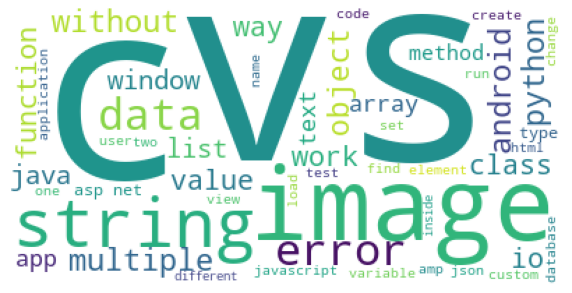

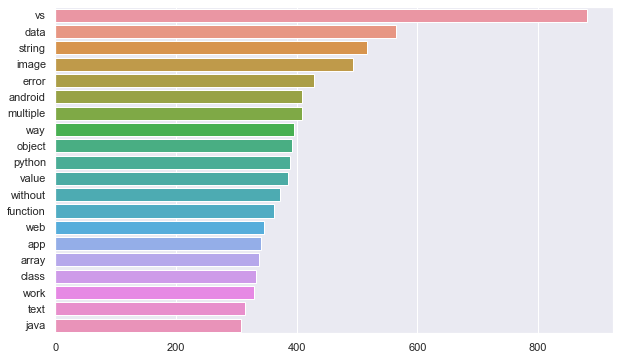

In [89]:
plot_20_most_frequent_tokens(df["Title"])

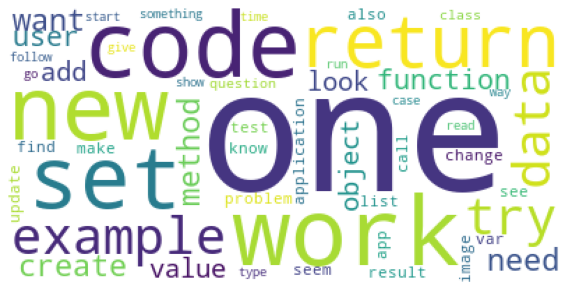

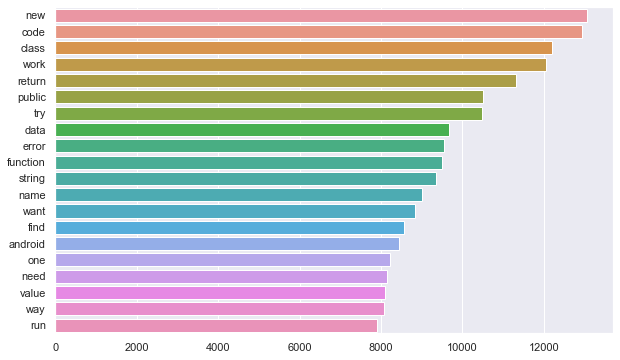

In [90]:
plot_20_most_frequent_tokens(df["Body"])

## <font color = purple>3. delete Nan & Save results as CSV</font>

In [ ]:
#display Nan
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

In [ ]:
#delete nan
df = df.dropna()

In [91]:
df.to_csv("cleaned/df_post_processing.csv", index = False)

# <font color = green>Partie 3 : Features Extraction</font>

## <font color = purple>1. Librairies and loading</font>

In [111]:
#Feature extraction
from sklearn.feature_extraction.text import CountVectorizer #pour le bag of word et n-grams
from sklearn.feature_extraction.text import TfidfVectorizer #pour le tf idf


#Train Test
from sklearn.model_selection import train_test_split

#Gensim & setup login
import gensim 
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) #set up login
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [93]:
#load csv
data = "cleaned/"
os.listdir(data)
fn = data + 'df_post_processing.csv'
df = pd.read_csv(fn)
df.head()

#create titel + body column
df["title_body"] = df["Title"]+" "+df["Body"]

## <font color = purple>2. Bag of words & Bigrams</font>

In [99]:
#Bag of Words
#Initialize
CountVec = CountVectorizer(ngram_range=(1,1),
                                       analyzer = 'word', #AJOUTER LES COMMENTAIRES !
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

#transform
X_bow = CountVec.fit_transform(df["title_body"])

#create dataframe
df_X_bow=pd.DataFrame(X_bow.toarray(),columns=CountVec.get_feature_names_out())

In [100]:
df_X_bow.head(5)

,.net,able,accept,access,accord,account,achieve,across,action,active,...,write,wrong,xcode,xml,xmlns,xmm,yes,yet,ymm,zip
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,4,0,0,0,1,0,0


In [101]:
#Avec les bigram
#Initialize
CountVec = CountVectorizer(ngram_range=(2,2),
                                       analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000) # to use bigrams ngram_range=(2,2)

#transform
X_bigram = CountVec.fit_transform(df["title_body"])

#create dataframe
df_X_bigram=pd.DataFrame(X_bigram.toarray(),columns=CountVec.get_feature_names_out())

In [102]:
df_X_bigram.head(5)

,.net core,.net framework,able find,abstract class,accept answer,access token,action android,action bar,activation lu,activity android,...,work without,wrapcontent android,write code,xml version,xmlns android,xmlns xsi,xmm xmm,xsi httpwwwworgxmlschemainstance,yes check,ymm ymm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color = purple>3. TF-IDF</font>

In [103]:
tfidf = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [104]:
X_tfidf = tfidf.fit_transform(df["title_body"])

In [105]:
#create dataframe
df_X_tfidf=pd.DataFrame(X_tfidf.toarray(),columns=tfidf.get_feature_names_out())

In [106]:
df_X_tfidf.head(10)

,.net,able,accept,access,accord,account,achieve,across,action,active,...,write,wrong,xcode,xml,xmlns,xmm,yes,yet,ymm,zip
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.162019,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.118750,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.169047,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.125322,0.0,0.0,...,0.000000,0.0,0.0,0.480844,0.0,0.0,0.0,0.116814,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.193065,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
9,0.304295,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


## <font color = purple>4. Word2Vec et Doc2Vec</font>

### <font color = grey>4.1. Word2Vec</font>

In [107]:
# Create list of tokens
tokens = df["title_body"].values.tolist()

# Tokenizing strings in list of strings
res = [sub.split() for sub in tokens]

In [112]:
# Initialize model
model = gensim.models.Word2Vec(res, vector_size = 100, window=10, min_count=2, workers=10)

# Train the model
model.train(res,total_examples=len(res),epochs=10)

2022-10-25 16:48:57,674 : INFO : collecting all words and their counts
2022-10-25 16:48:57,675 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-10-25 16:48:57,827 : INFO : PROGRESS: at sentence #10000, processed 843061 words, keeping 41469 word types
2022-10-25 16:48:57,948 : INFO : PROGRESS: at sentence #20000, processed 1706130 words, keeping 62875 word types
2022-10-25 16:48:58,028 : INFO : collected 73858 word types from a corpus of 2276786 raw words and 26054 sentences
2022-10-25 16:48:58,029 : INFO : Creating a fresh vocabulary
2022-10-25 16:48:58,221 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=2 retains 71898 unique words (97.34625903761271%% of original 73858, drops 1960)', 'datetime': '2022-10-25T16:48:58.220659', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'prepare_vocab'}
2022-10-25 16:48:58,221 : INFO : Word2Vec lifecycle e

(21917314, 22767860)

In [113]:
#Observer le vecteur de "python"
model.wv["python"]

array([ 1.6806803 ,  2.380128  , -0.24369374, -4.670824  , -0.60813826,
        0.904776  ,  1.075097  , -2.7322383 ,  0.2673416 , -2.5717688 ,
        3.578992  , -2.1982114 , -2.9204693 ,  0.33225456, -0.41679984,
        1.1173911 , -1.8628709 ,  0.5343412 ,  1.0738882 ,  3.7326858 ,
       -0.13529308, -3.4661534 , -5.5486226 ,  2.719829  ,  0.96092695,
       -0.6317599 , -0.19254982, -0.6695301 , -0.49372163, -2.1030934 ,
       -3.8633127 ,  0.08594791,  1.2116747 ,  2.1775608 ,  0.5650029 ,
        0.39139736,  4.726535  ,  4.0133348 , -2.6467938 , -1.4541429 ,
       -0.4181709 ,  0.5998296 ,  2.9762285 , -1.2742451 ,  3.2566223 ,
       -2.6661625 , -1.3309442 ,  3.655903  ,  2.07547   ,  0.41691896,
       -2.1208496 ,  1.26003   ,  1.6280109 , -1.2572124 ,  0.25475425,
        2.3028073 ,  0.22285911,  1.9104055 , -2.5334294 ,  0.3692101 ,
       -3.6844113 ,  2.530406  , -3.2987974 , -2.3534849 , -1.0169474 ,
        1.3563601 , -2.3184218 ,  0.35318843,  1.1339093 , -5.32

In [114]:
#Les 6 mots les plus similaire à python
w1 = ["python"]
model.wv.most_similar (positive=w1,topn=6)

[('interpreter', 0.6729508638381958),
 ('perl', 0.6392409205436707),
 ('anaconda', 0.5751824378967285),
 ('ipython', 0.5744950771331787),
 ('subprocess', 0.561710774898529),
 ('pip', 0.5601561069488525)]

In [115]:
#Similarité entre 2 mots :
model.wv.similarity(w1="java", w2="python")

0.3481676

In [116]:
# view similar words based on gensim's model
similar_words = {search_term: [item[0] for item in model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['python']}
similar_words

{'python': ['interpreter', 'perl', 'anaconda', 'ipython', 'subprocess']}

### <font color = grey>4.2. Doc2Vec</font>

In [117]:
data = df["title_body"]
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(data)]

In [118]:
max_epochs = 100
vec_size = 20
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

2022-10-25 16:51:25,178 : INFO : Doc2Vec lifecycle event {'params': 'Doc2Vec(dm/m,d20,n5,w5,s0.001,t3)', 'datetime': '2022-10-25T16:51:25.178342', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}
2022-10-25 16:51:25,186 : INFO : collecting all words and their counts
2022-10-25 16:51:25,187 : WARNING : Each 'words' should be a list of words (usually unicode strings). First 'words' here is instead plain <class 'str'>.
2022-10-25 16:51:25,188 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2022-10-25 16:51:25,643 : INFO : PROGRESS: at example #10000, processed 6498651 words (14290595/s), 108 word types, 10000 tags
2022-10-25 16:51:26,087 : INFO : PROGRESS: at example #20000, processed 13132968 words (14948986/s), 197 word types, 20000 tags
2022-10-25 16:51:26,476 : INFO : collected 216 word types and 26054 unique tags from a corpus of 26054 examples 

In [119]:
df["title_body"].shape

(26054,)

In [120]:
#creation de la matrice des vecteurs de chaque phrases
X_doc2vec = np.zeros((26054,20)) #20 correpsond au vector_size

for i in range(26054):
    X_doc2vec[i] = model[str(i)]

In [121]:
X_doc2vec

array([[-0.02615408, -0.02989564, -0.04940378, ...,  0.04612811,
        -0.04750933, -0.01729044],
       [-0.01884955,  0.01303691, -0.02845779, ..., -0.04271271,
        -0.01801307,  0.00865812],
       [-0.0102846 , -0.03615022,  0.02092299, ...,  0.01767989,
        -0.02875156,  0.04407407],
       ...,
       [-0.02841936,  0.00282226,  0.02942412, ...,  0.04854989,
         0.04384113, -0.00650169],
       [ 0.03011979, -0.04326785,  0.02485073, ..., -0.00590817,
        -0.045671  ,  0.02410632],
       [-0.00834982,  0.00958341, -0.00774117, ..., -0.04799619,
         0.02863705,  0.03295622]])

## <font color = purple>5. USE</font>

## <font color = purple>6. BERT</font>

# <font color = green>Partie 4 : Machine Learning</font>

## <font color = purple>1. Librairies</font>

In [122]:
#Binarizer
from sklearn.preprocessing import MultiLabelBinarizer

#Models
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.multiclass import OneVsRestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import make_scorer

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Warning ignore
import warnings
warnings.filterwarnings("ignore")

## <font color = purple>2. LDA (Unsupervised)</font>

In [ ]:
# Sampling dataset
vectorizer_X = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                   strip_accents = None, encoding = 'utf-8', 
                                   preprocessor=None, 
                                   token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                   max_features=1000)

In [ ]:
# 80/20 split
X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(
    df['Body'], df['Tags'], test_size=0.2,train_size=0.8, random_state=0)

In [ ]:
# TF-IDF matrices
X_tfidf_train = vectorizer_X.fit_transform(X_lda_train)
X_tfidf_test = vectorizer_X.transform(X_lda_test)

- Nous allons maintenant entrainer différents modèle LDA.
- Chacun de ces modèles aura un nb de topics différents.
- Nous évaluerons les différent modèles à l'aide du perplexity score :

![title](perplexity_score.png)

In [ ]:
def lda(vectorizer, data_train, data_test):

    ''' Showing the perplexity score for several LDA models with different values
    for n_components parameter, and printing the top words for the best LDA model
    (the one with the lowest perplexity)
    Parameters:
    vectorizer: TF-IDF convertizer                                              
    data_train: data to fit the model with
    data_test: data to test
    '''

    best_perplexity = np.inf
    best_lda = 0
    perplexity_list = []
    n_topics_list = []
    print("Extracting term frequency features for LDA...")

    for n_topics in np.linspace(10, 50, 5, dtype='int'):
        lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(data_train)
        n_topics_list.append(n_topics)
        perplexity = lda_model.perplexity(data_test)
        perplexity_list.append(perplexity)

        # Perplexity is defined as exp(-1. * log-likelihood per word)
        # Perplexity: The smaller the better
        if perplexity <= best_perplexity:
            best_perplexity = perplexity
            best_lda = lda_model
                                
    plt.title("Evolution of perplexity score depending on number of topics")
    plt.xlabel("Number of topics")
    plt.ylabel("Perplexity")
    plt.plot(n_topics_list, perplexity_list)
    plt.show()

In [ ]:
lda(vectorizer_X, X_tfidf_train, X_tfidf_test)

Le perplexity score le plus bas est obtenu avec 10 topics !

In [ ]:
best_lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)

In [ ]:
def Recommend_tags_lda(text, X_train):
    
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.
    Parameters:
    text: the stackoverflow post of user
    X_train: data to fit the model with
    '''

    text = clean_text(text)
    text = clean_punct(text)
    text = stopWordsRemove(text)
    text = lemitizeWords(text)
    n_topics = 10
    threshold = 0.010
    list_scores = []
    list_words = []
    used = set()

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    vectorizer_text.fit(X_train)
    text_tfidf = vectorizer_text.transform([text])

    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    text_projection = lda_model.transform(text_tfidf)
    feature_names = vectorizer_text.get_feature_names_out()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for topic in range(n_topics):
        topic_score = text_projection[0][topic]

        for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
            score = topic_score*word_score

            if score >= threshold:
                list_scores.append(score)
                list_words.append(feature_names[word_idx])
                used.add(feature_names[word_idx])

    results = [tag for (y,tag) in sorted(zip(list_scores,list_words), key=lambda pair: pair[0], reverse=True)]
    unique_results = [x for x in results if x not in used] # get only unique tags
    tags = " ".join(results[:5])

    return tags

In [ ]:
text = input('Ask a question: ')
tags = Recommend_tags_lda(text, X_lda_train)
print('Recommended tags are:', tags)

In [ ]:
def Recommend_tags_lda_test(X_tfidf_test, X_train):
    
    ''' Recomendation system for stackoverflow posts based on a lda model, 
    it returns up to 5 tags.

    Parameters:

    X_tfidf_test: the stackoverflow posts after TF-IDF transformation
    X_train: data to fit the model with
    '''

    df_tags_test_lda = pd.DataFrame(index=[i for i in range(X_tfidf_test.shape[0])], 
             columns=['0.010', '0.011', '0.012', '0.013'])
    corpus = X_tfidf_test
    n_topics = 10

    vectorizer_text = TfidfVectorizer(analyzer='word', min_df=0.0, max_df = 1.0, 
                                    strip_accents = None, encoding = 'utf-8', 
                                    preprocessor=None, 
                                    token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                    max_features=1000)
    X_tfidf_train = vectorizer_text.fit_transform(X_train)
    lda_model = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                        learning_method='online',
                                        learning_offset=50.,
                                        random_state=0).fit(X_tfidf_train)
    corpus_projection = lda_model.transform(corpus)
    
    feature_names = vectorizer_text.get_feature_names()
    lda_components = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis] # normalization

    for column, threshold in zip(range(4), [0.010, 0.011, 0.012, 0.013]): #  threshold to exceed to be considered as a relevant tag

        for text in range(corpus.shape[0]):
            list_scores = []
            list_words = []

            for topic in range(n_topics):
                topic_score = corpus_projection[text][topic]

                for (word_idx, word_score) in zip(lda_components[topic].argsort()[:-5:-1], sorted(lda_components[topic])[:-5:-1]):
                    score = topic_score*word_score

                    if score >= threshold:
                        list_scores.append(score)
                        list_words.append(feature_names[word_idx])

            results = [tag for (y,tag) in sorted(zip(list_scores,list_words), 
                                                 key=lambda pair: pair[0], reverse=True)]
            df_tags_test_lda.iloc[text, column] = results[:5] #maximum five tags

    return df_tags_test_lda

In [ ]:
Recommend_tags_lda_test(X_tfidf_test, X_lda_train)

In [ ]:
#no_topics = 20

In [ ]:
#text = df['Body']

In [ ]:
"""vectorizer_train = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+", # Need to repeat token pattern
                                       max_features=1000)"""

In [ ]:
#TF_IDF_matrix = vectorizer_train.fit_transform(text)

In [ ]:
#lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(TF_IDF_matrix)

In [ ]:
""""def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")""""

In [ ]:
#display_topics(lda, vectorizer_train.get_feature_names(), 10)

Pas mal du tout les topics on du sens !

## <font color = purple>3. ML Preparation</font>

### <font color = grey>3.1. Target binarize</font>

In [123]:
#Define y
y = df['Tags']

#Replace [, ], and '
y=y.str.replace("[","")
y=y.str.replace("]","")
y=y.str.replace("'","")

#Create list of list
y = y.str.split(', ')

#Binarize y
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

#Create a dataframe for vizualisation
df_ybin = pd.DataFrame(multilabel_binarizer.fit_transform(y),columns=multilabel_binarizer.classes_)
df_ybin.head(10)

,.net,ajax,algorithm,android,android-studio,angular,angularjs,apache,apache-spark,arrays,...,string,swift,ubuntu,unit-testing,unix,visual-studio,windows,wpf,xcode,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <font color = grey>3.2. Metrics</font>

In [126]:
def avg_jaccard(y_test, y_pred):
    score = jaccard_score(y_test, y_pred, average="micro")
    return score

In [127]:
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score micro: {}".format(jaccard_score(y_test, y_pred, average="micro")))
    print("Jacard score macro: {}".format(jaccard_score(y_test, y_pred, average="macro")))
    print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
    print("---")

## <font color = purple>4. Modèles</font>

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.jaccard_score.html#sklearn.metrics.jaccard_score

nous allons utiliser X_bow, X_bigram, X_tfidf, X_doc2vec en entrée

In [142]:
#Split data in train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_doc2vec, y_bin, test_size = 0.2, random_state = 0)

ONE VS REST

In [143]:
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

In [145]:
for classifier in [dummy, sgd, lr, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---
Clf:  SGDClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---
Clf:  LogisticRegression
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---
Clf:  LinearSVC
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---
Clf:  Perceptron
Jacard score micro: 0.012371727246571401
Jacard score macro: 0.0009725108948917586
Accuracy: 0.0
---
Clf:  PassiveAggressiveClassifier
Jacard score micro: 0.058562197092084003
Jacard score macro: 0.0022754531695876705
Accuracy: 0.002302820955670697
---


In [144]:
for classifier in [dummy, sgd, lr, mn, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---
Clf:  SGDClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---
Clf:  LogisticRegression
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---


ValueError: Negative values in data passed to MultinomialNB (input X)

MLP

In [146]:
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---


Random Forest

In [147]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score micro: 0.0
Jacard score macro: 0.0
Accuracy: 0.0
---


## <font color = purple>4. Tunning</font>

In [ ]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [ ]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jaccard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

In [ ]:
CV_svc.best_params_

In [ ]:
best_model = CV_svc.best_estimator_

In [ ]:
y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)

CONFUSION MATRIX

In [ ]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [ ]:
cf_matrix = confusion_matrix(y_test[:,0], y_pred[:,0])

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
for i in range(y_train.shape[1]):
    cf_matrix = confusion_matrix(y_test[:,i], y_pred[:,i])
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(i)
    plt.title(multilabel_binarizer.classes_[i])
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    print("")

FEATURES IMPORTANCE

SUGGESSTION D'UN TAG POUR TESTER